In [1]:
from deepcrypto.backtest import *
from deepcrypto.portfolio_analysis import *
from deepcrypto.data_utils.crawlers.bitfinex_kaggle import *
from talib.abstract import *
from pprint import pprint

In [2]:
def strategy(df, config):
    volume = df.volume
    close = df.close
    
    volume_std = volume.rolling(config["volume_p"]).std()
    volume_mean = volume.rolling(config["volume_p"]).mean()
    
    close_std = close.rolling(config["price_p"]).std()
    close_mean = close.rolling(config["price_p"]).mean()
    
    volume_signal = volume > (volume_mean + volume_std * config["volume_std_coef"])
    price_signal = close > (close_mean + close_std * config["price_std_coef"])
    
    # volume_signal = (volume_signal & (volume_signal.diff() == 1))
    # price_signal = (price_signal & (price_signal.diff() == 1))
        
    df["enter_long"] = volume_signal & price_signal
    df["trade_cost"] = 0.001
    
    df["stop_loss"] = config["stop_loss"]
    df["take_profit"] = config["take_profit"]
    df["time_cut"] = config["time_cut"]
    return df

In [3]:
def backtest_and_report(config, ticker):
    data = read_bitfinex_data("/home/ych/Storage/bitfinex/bitfinex.db", "1H", ticker)
    data = data.backtest.add_defaults()

    order, port = strategy(data, config).backtest()
    pprint(calc_from_order_df(order))
    qs.reports.full(port["portfolio_value"].resample("1D").last(), benchmark=port["open"].resample("1D").last())

In [32]:
DEFAULT_CONFIG = {'time_cut': 48,
 'stop_loss': 0.03,
 'take_profit': 0.2,
 'volume_p': 48,
 'price_p': 24,
 'volume_std_coef': 2.5,
 'price_std_coef': 2.5}

backtest completed in 0.06711339950561523 seconds
{'bothside_avg_holding_bars': 31.857142857142858,
 'bothside_profit_factor': 2.2563784463439744,
 'bothside_total_profit': 1534689.0191457523,
 'bothside_total_trades': 238,
 'bothside_win_rate': 50.0,
 'buyside_avg_holding_bars': 31.857142857142858,
 'buyside_profit_factor': 2.2563784463439744,
 'buyside_total_profit': 1534689.0191457523,
 'buyside_total_trades': 238,
 'buyside_win_rate': 50.0,
 'sellside_avg_holding_bars': nan,
 'sellside_profit_factor': nan,
 'sellside_total_profit': 0.0,
 'sellside_total_trades': 0,
 'sellside_win_rate': nan}


/home/ych/PycharmProjects/DeepCrypto/deepcrypto/portfolio_analysis/__init__.py:7: RuntimeWarning: invalid value encountered in long_scalars
  a[f"{label}_win_rate"] = order_df.realized[order_df.realized >= 0].count()/order_df.realized.count() * 100


                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2016-03-09  2016-03-09
End Period                 2021-05-18  2021-05-18
Risk-Free Rate             0.0%        0.0%
Time in Market             29.0%       97.0%

Cumulative Return          13,617.74%  30,903.68%
CAGR%                      157.9%      201.73%

Sharpe                     1.93        1.3
Sortino                    4.7         2.05
Sortino/√2                 3.32        1.45

Max Drawdown               -21.35%     -93.85%
Longest DD Days            189         1101
Volatility (ann.)          37.33%      88.08%
R^2                        0.22        0.22
Calmar                     7.4         2.15
Skew                       3.78        0.37
Kurtosis                   26.45       5.46

Expected Daily %           0.26%       0.3%
Expected Monthly %         8.12%       9.53%
Expected Yearly %          127.1%      160.16%
Kelly Criterion            21.

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2019-01-03  2019-02-03  2019-02-23    51    -21.347609        -18.750048
2  2017-09-19  2017-11-14  2017-11-23    65    -17.416510        -16.536392
3  2021-01-20  2021-03-18  2021-05-01   101    -15.562248        -13.239988
4  2019-04-03  2019-05-30  2019-10-09   189    -15.165592        -15.093416
5  2019-10-10  2020-01-08  2020-02-06   119    -13.148466        -12.957708

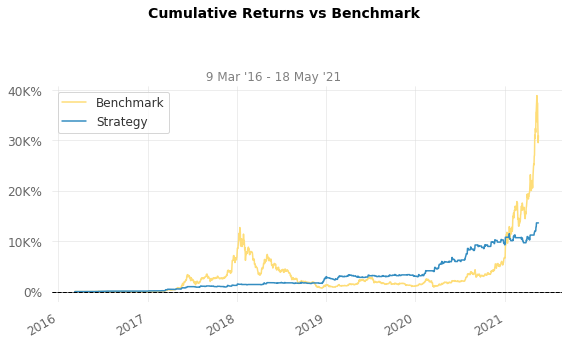

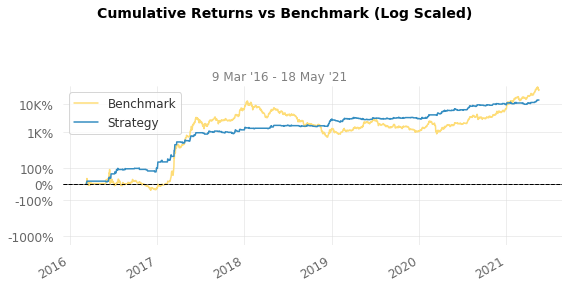

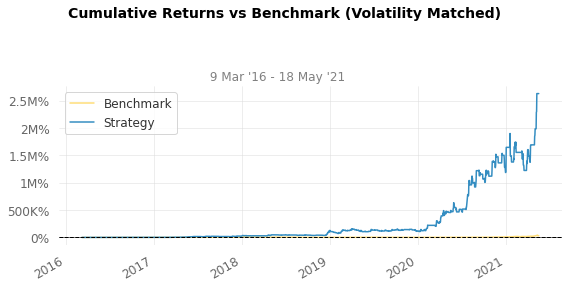

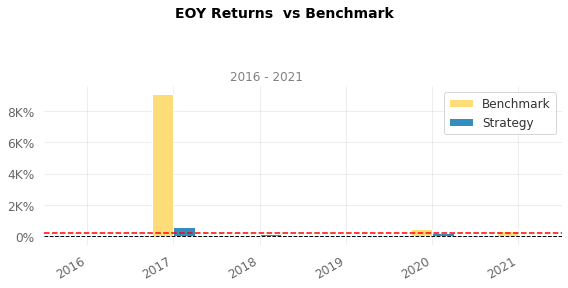

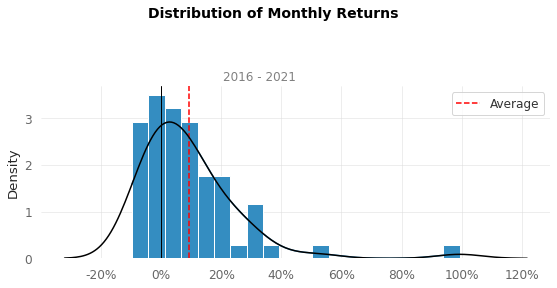

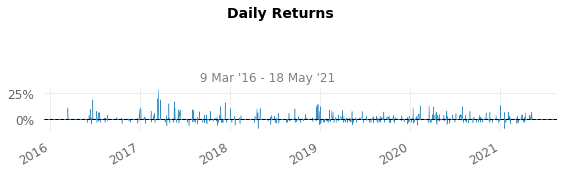

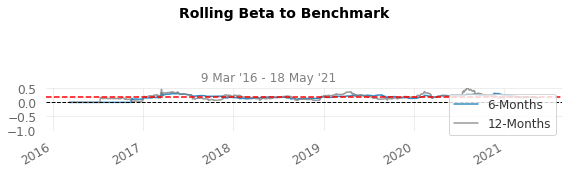

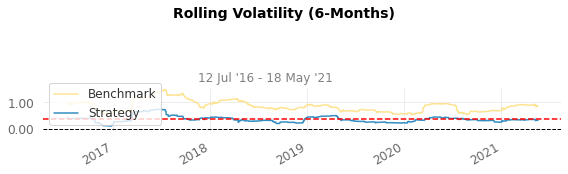

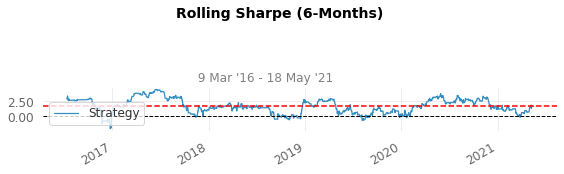

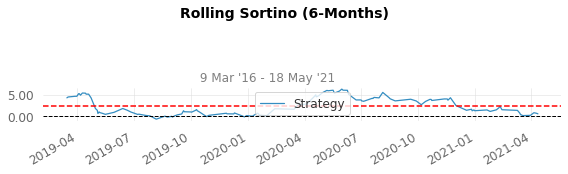

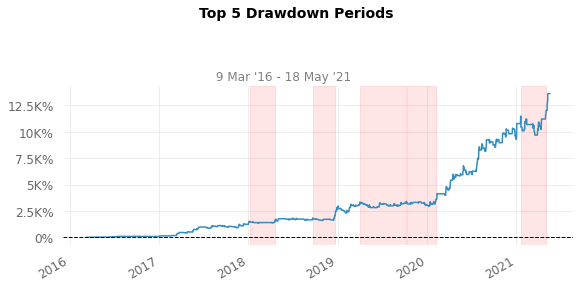

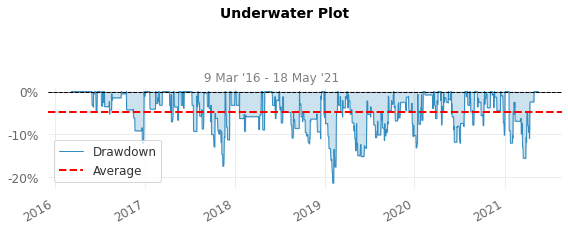

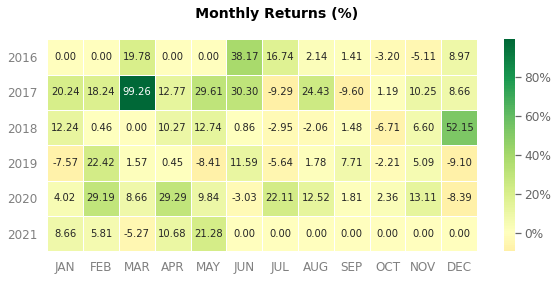

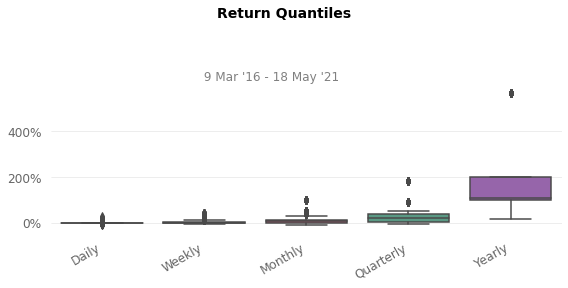

In [33]:
backtest_and_report(DEFAULT_CONFIG, "ETHUSD")

backtest completed in 0.10015034675598145 seconds
{'bothside_avg_holding_bars': 18.199143468950748,
 'bothside_profit_factor': 1.7500370555594784,
 'bothside_total_profit': 1807298.4753818368,
 'bothside_total_trades': 467,
 'bothside_win_rate': 54.603854389721626,
 'buyside_avg_holding_bars': 18.199143468950748,
 'buyside_profit_factor': 1.7500370555594784,
 'buyside_total_profit': 1807298.4753818368,
 'buyside_total_trades': 467,
 'buyside_win_rate': 54.603854389721626,
 'sellside_avg_holding_bars': nan,
 'sellside_profit_factor': nan,
 'sellside_total_profit': 0.0,
 'sellside_total_trades': 0,
 'sellside_win_rate': nan}


/home/ych/PycharmProjects/DeepCrypto/deepcrypto/portfolio_analysis/__init__.py:7: RuntimeWarning: invalid value encountered in long_scalars
  a[f"{label}_win_rate"] = order_df.realized[order_df.realized >= 0].count()/order_df.realized.count() * 100


                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2013-04-01  2013-04-01
End Period                 2021-05-18  2021-05-18
Risk-Free Rate             0.0%        0.0%
Time in Market             26.0%       96.0%

Cumulative Return          14,009.61%  42,377.88%
CAGR%                      83.76%      110.43%

Sharpe                     1.54        1.08
Sortino                    5.03        1.64
Sortino/√2                 3.56        1.16

Max Drawdown               -17.32%     -84.25%
Longest DD Days            213         1126
Volatility (ann.)          29.74%      70.08%
R^2                        0.14        0.14
Calmar                     4.84        1.31
Skew                       18.0        0.21
Kurtosis                   593.22      10.41

Expected Daily %           0.17%       0.2%
Expected Monthly %         5.18%       6.37%
Expected Yearly %          73.31%      95.89%
Kelly Criterion            26

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2020-05-17  2020-10-08  2020-12-16   213    -17.323721        -16.598112
2  2018-12-21  2019-02-03  2019-05-11   141    -12.231489        -10.258981
3  2014-03-26  2014-05-17  2014-05-25    60    -11.634828        -11.485153
4  2021-01-07  2021-01-29  2021-04-11    94    -10.517382         -7.152958
5  2014-07-12  2014-09-24  2014-10-14    94    -10.436699         -9.803915

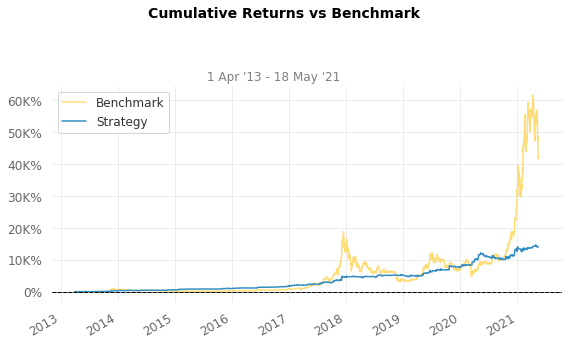

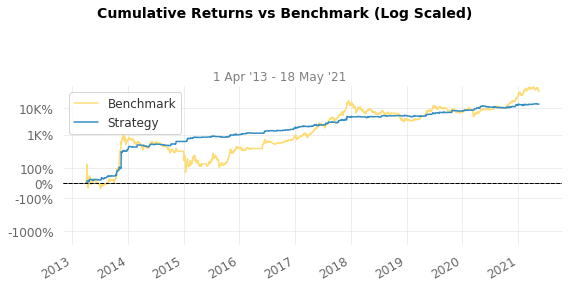

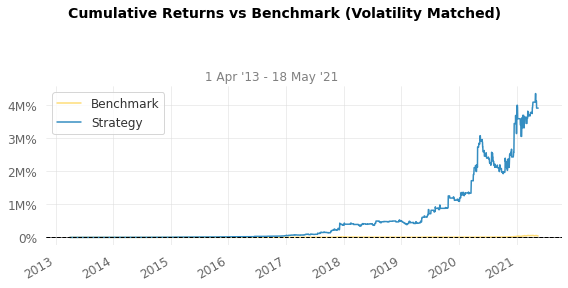

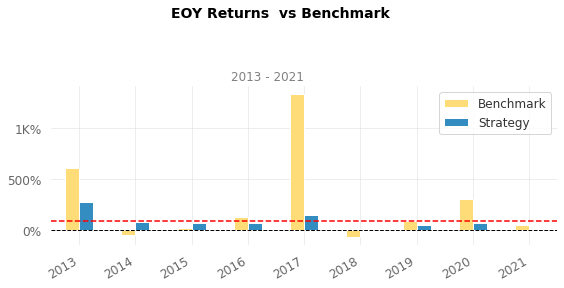

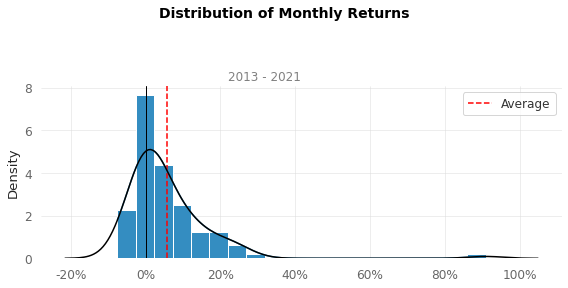

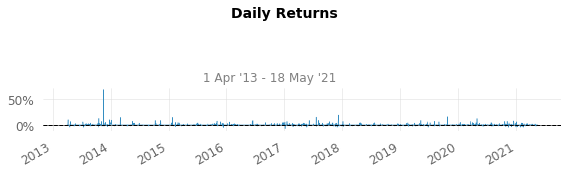

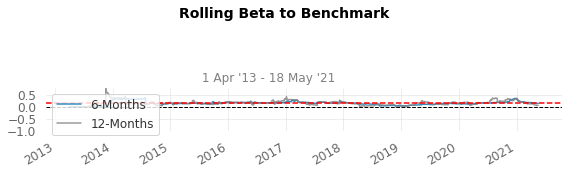

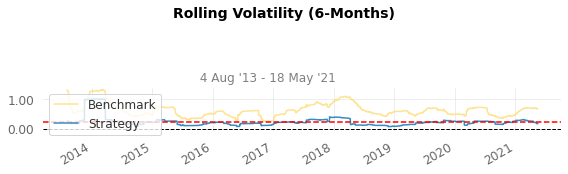

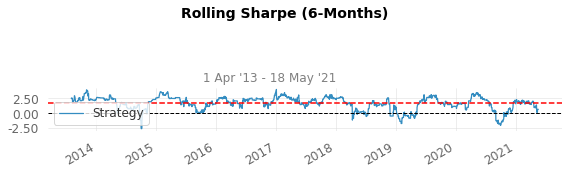

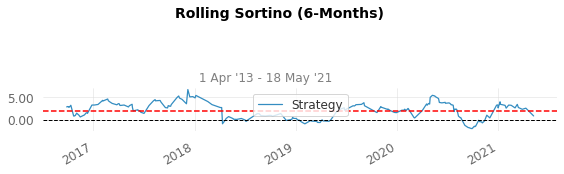

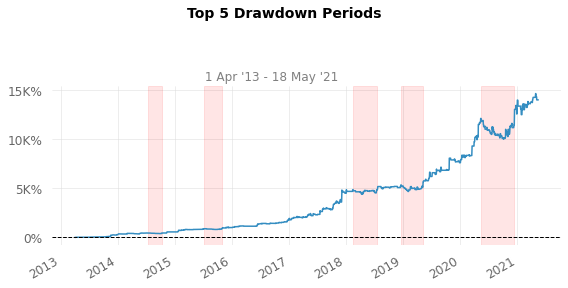

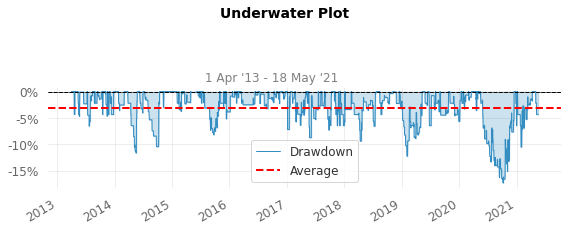

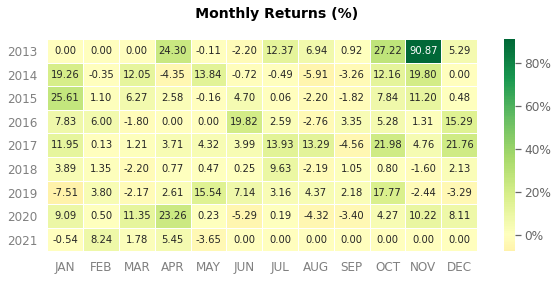

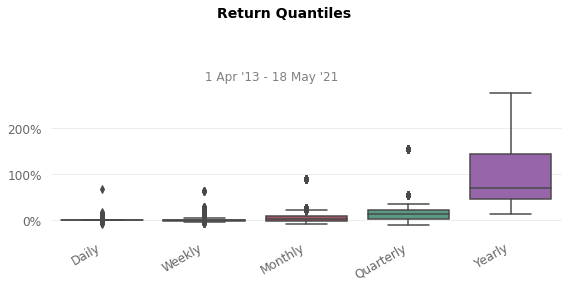

In [18]:
DEFAULT_CONFIG = {'time_cut': 24,
 'stop_loss': 0.02,
 'take_profit': 0.2,
 'volume_p': 48,
 'price_p': 96,
 'volume_std_coef': 2.5,
 'price_std_coef': 1.5}

backtest_and_report(DEFAULT_CONFIG, "BTCUSD")

In [7]:
import ray
from ray import tune
def optimizer(config, df):
    df = df.copy()
    order_df, port_df = run_backtest_df(strategy(df, config))
    tune.report(sortino=qs.stats.sortino(port_df["portfolio_value"].resample("1D").last()))

def optimize(df):
    result = tune.run(
        tune.with_parameters(optimizer, df=df),
        config = {
            "time_cut" : tune.grid_search([24, 48, 96]),
            "stop_loss" : tune.grid_search([0.02, 0.03, 0.05, 0.1]),
            "take_profit" : tune.grid_search([0.05, 0.1, 0.15, 0.2]),
            'volume_p' : tune.grid_search([24, 48, 96]),
            'price_p' : tune.grid_search([24, 48, 96]),
            'volume_std_coef' : tune.grid_search([1.5, 2, 2.5, 3]),
            'price_std_coef' : tune.grid_search([1.5, 2, 2.5, 3])
        },
        local_dir="./ray_results",
    )
    return result

/home/ych/anaconda3/envs/DeepCrypto/lib/python3.7/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  "update your install command.", FutureWarning)


In [8]:
ray.init()

2021-05-26 20:40:20,329	INFO services.py:1269 -- View the Ray dashboard at http://127.0.0.1:8268


{'node_ip_address': '192.168.68.106',
 'raylet_ip_address': '192.168.68.106',
 'redis_address': '192.168.68.106:33243',
 'object_store_address': '/tmp/ray/session_2021-05-26_20-40-19_205458_506759/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2021-05-26_20-40-19_205458_506759/sockets/raylet',
 'webui_url': '127.0.0.1:8268',
 'session_dir': '/tmp/ray/session_2021-05-26_20-40-19_205458_506759',
 'metrics_export_port': 44493,
 'node_id': 'ed049cebcf28da10bc2086ce4905b2463fd2b75040aa5b3a1a53b435'}

In [19]:
data = read_bitfinex_data("/home/ych/Storage/bitfinex/bitfinex.db", "1H", "ETHUSD")
data = data.backtest.add_defaults()

In [20]:
data = data[:int(data.index.__len__() * 0.7)]

In [ ]:
result = optimize(data)

In [23]:
result.get_best_config("sortino", mode="max")

{'time_cut': 24,
 'stop_loss': 0.03,
 'take_profit': 0.2,
 'volume_p': 48,
 'price_p': 24,
 'volume_std_coef': 2.5,
 'price_std_coef': 2.5}